# Generate example AVC 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

data=[]
score=[]
n=100 #number of examples

for i in range(n): #create n examples, 
  arr=[]
  for j in range(10): #each is a list of 10 numbers (representing the numbers after R___)
    arr.append(random.randint(0, 1000))
  score.append(arr[6]*7/100) #this makes everything based on 7th term
  #score.append(5*arr[6]+2*arr[3]*arr[3]+4*arr[5]*arr[5]+7/arr[2]+arr[1]) #random polynomial 
  data.append(arr)

#scale scores so that they are between 0 and 70 (linearly)
score[:] = [int(i / max(score) * 70) for i in score]
for i in range(n):
  data[i].append(score[i])

df = pd.DataFrame(data, columns=['r0', 'r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9', 'score'])
df

,r0,r1,r2,r3,r4,r5,r6,r7,r8,r9,score
0,397,789,604,235,265,563,214,975,553,526,15
1,274,147,892,500,26,233,840,814,912,388,58
2,165,624,883,351,922,599,970,730,630,299,68
3,386,606,965,763,47,649,943,872,238,299,66
4,431,114,179,495,482,579,490,637,740,918,34
...,...,...,...,...,...,...,...,...,...,...,...
95,97,228,692,828,338,337,998,867,32,525,70
96,96,979,902,783,247,462,466,428,616,748,32
97,127,639,768,934,422,520,358,55,737,77,25
98,897,108,747,500,177,471,273,268,724,829,19


# Calculate Leverage for each Variable

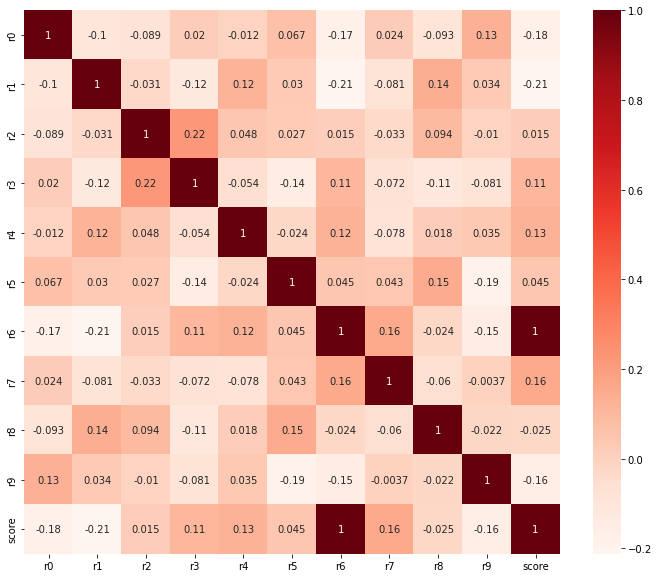

In [ ]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
#Correlation with output variable
cor_target = abs(cor["score"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

r1       0.211272
r6       0.999897
score    1.000000
Name: score, dtype: float64

# Split data and use AI models

In [ ]:
X=df.iloc[:, : 10]
y=df['score']
#print(X)
#print(y)

In [ ]:
# split train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(len(X), len(y))
#print(X_train)
#print(X_test)

100 100


In [ ]:
#linear regression
from sklearn.linear_model import LinearRegression
linearRegr = LinearRegression()
linearRegr.fit(X_train, y_train)
predictions = linearRegr.predict(X_test)
score = linearRegr.score(X_test, y_test)

trainPredictions = linearRegr.predict(X_train)
trainScore = linearRegr.score(X_train, y_train)

print(score, trainScore)

0.9997996912627887 0.9998029902829803


In [ ]:
#neural net sk learn, search for best alpha for given dataset
from sklearn.neural_network import MLPClassifier

bestScore=-1 
bestAlpha=3 #number for anti overfitting

'''for i  in np.arange(0, 1e-4, 1e-5): 
  mlp= MLPClassifier(alpha=i, hidden_layer_sizes=(10,), random_state=1, max_iter=5000)
  mlp.fit(X_train, y_train)

  predictions = mlp.predict(X_test)
  score = mlp.score(X_test, y_test)

  trainPredictions = mlp.predict(X_train)
  trainScore = mlp.score(X_train, y_train) 

  if(score>bestScore): 
    bestAlpha=i 
    bestScore=score '''
mlp= MLPClassifier(alpha=bestAlpha, hidden_layer_sizes=(10,), random_state=1, max_iter=30000)
mlp.fit(X_train, y_train)

predictions = mlp.predict(X_test)
score = mlp.score(X_test, y_test)

trainPredictions = mlp.predict(X_train)
trainScore = mlp.score(X_train, y_train)   
print(bestAlpha, score, trainScore)

3 0.0 0.05333333333333334
